In [6]:
import torch
import torch.nn as nn
from pau import PAU

import matplotlib.pyplot as plt

torch.set_grad_enabled(False)

import numpy as np

In [7]:
def init_sequential(layers):
    modules = []
    for i in range(len(layers)-2):
        modules.append(nn.Linear(layers[i], layers[i+1]))
        modules.append(PAU(initial_shape='relu'))
    modules.append(nn.Linear(layers[-2], layers[-1]))
    return nn.Sequential(*modules)

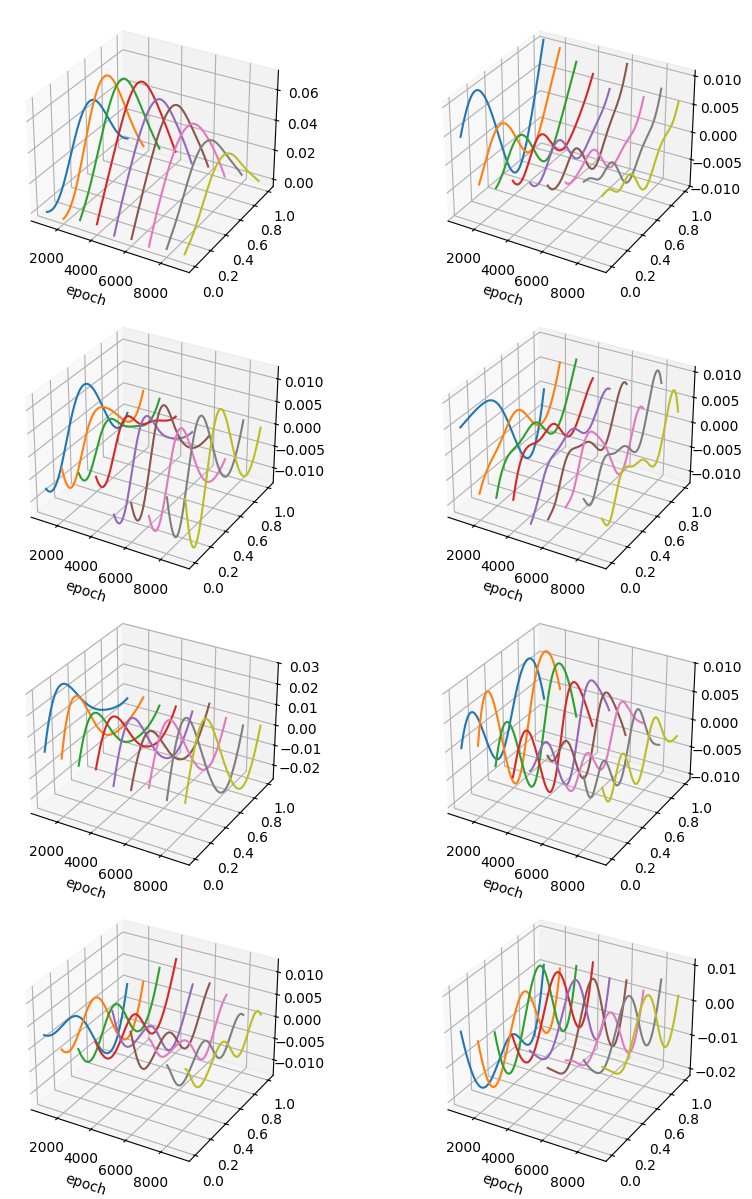

In [44]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(10, 12), subplot_kw={'projection': '3d'})
fig.tight_layout()

axs = np.array(ax).ravel()

t = torch.linspace(0, 1, 200)
trunk = init_sequential([1, 100, 100, 8])
for k in range(1000, 10000, 1000):
    model_data = torch.load(f'dataset/ds20k/model/{k}_ds20k_basis.model')
    trunk.load_state_dict(model_data['T'][0])

    values = trunk(t.unsqueeze(dim=1)).squeeze()
    
    for i, a in enumerate(axs):        
        a.plot(k, t, values[:, i])
        a.set_xlabel('epoch')

plt.savefig(f'figures/basis_model_#epoch{Basis_epoch}.png', bbox_inches='tight')
plt.show()